# Keras Deep NN Model To Compare to Decision Tree
***
###  TODO:
- [x] Balance data
- [x] Shuffle data
- [x] Build Sequential model and make it run
- [ ] Loop over Sequential model to optimise the architecture
- [x] Log loss and accuracy
- [ ] Plot logged data again decision tree

### Figure Out:
- [ ] Performance difference with different datasets
- [ ] Test how to save weights and load them...

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import collections

def balanceData(data):
    num_zeros = len(np.argwhere(data[:,-1] == 0))
    num_ones = len(np.argwhere(data[:,-1] == 1))
    nums = [num_zeros, num_ones]
    num = np.argmin(nums)

    bdata = []
    count = 0

    for i in range(len(data)):
        if data[i][-1] == num:
            bdata.append(data[i])
        else:
            if count < nums[num]:
                bdata.append(data[i])
                count +=1
            else:
                pass
    bdata = np.array(bdata)
    
    return bdata

def checkBalanced(data):
    
    num_zeros = len(np.argwhere(data[:,-1] == 0))
    num_ones = len(np.argwhere(data[:,-1] == 1))
    
    if num_zeros == num_ones:
        print("Dataset is Balanced")
    else:
        print("ERROR: Dataset NOT Balanced")
    

def loadDataset(file_name):
    data = pd.read_csv("data/" + file_name)
    # print(data.head(10))

    data = data.to_numpy()
    print(f"Raw Data Shape: {data.shape}")
    data = balanceData(data)      # balancing data
    checkBalanced(data)
    np.random.shuffle(data)       # shuffling data
    print("Dataset was Shuffled")
    
    X = data[:, 0:-1]
    y = data[:, -1]

    X = np.asarray(X).reshape(X.shape[0], X.shape[1])
    X = tf.keras.utils.normalize(X, axis=0)
    y = np.asarray(y).reshape(y.shape[0], 1)
    
    print(f"Input Data Shape: {X.shape}")
    print(f"Target Data Shape: {y.shape}")
    
    return X, y

############################################################

title = "datasets_228_482_diabetes.csv"
# title = "data_banknote_authentication.csv"

X, y = loadDataset(title)

Raw Data Shape: (768, 9)
Dataset is Balanced
Dataset was Shuffled
Input Data Shape: (536, 8)
Target Data Shape: (536, 1)


In [5]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

in_dim = X.shape[1]
batch_size = 32
epochs = 30

my_callbacks = [tf.keras.callbacks.BaseLogger(stateful_metrics = ["loss", "acc", "val_loss", "val_acc"])]

model = Sequential()
model.add(Dense(32, activation = "relu", input_shape=(in_dim,)))
model.add(Dense(16, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
model.compile(optimizer = "Adam",
              loss = "binary_crossentropy",
              metrics=["accuracy"])
history_callback = model.fit(X, y, batch_size = batch_size, epochs = epochs, validation_split = 0.1, callbacks = my_callbacks)

Train on 482 samples, validate on 54 samples
Epoch 1/30
482/482 [==============================] - 1s 2ms/sample - loss: 0.6920 - accuracy: 0.4938 - val_loss: 0.6903 - val_accuracy: 0.5556
Epoch 2/30
482/482 [==============================] - 0s 306us/sample - loss: 0.6912 - accuracy: 0.6017 - val_loss: 0.6901 - val_accuracy: 0.6852
Epoch 3/30
482/482 [==============================] - 0s 236us/sample - loss: 0.6903 - accuracy: 0.5415 - val_loss: 0.6879 - val_accuracy: 0.6111
Epoch 4/30
482/482 [==============================] - 0s 208us/sample - loss: 0.6894 - accuracy: 0.6203 - val_loss: 0.6873 - val_accuracy: 0.6667
Epoch 5/30
482/482 [==============================] - 0s 168us/sample - loss: 0.6879 - accuracy: 0.6722 - val_loss: 0.6859 - val_accuracy: 0.6667
Epoch 6/30
482/482 [==============================] - 0s 212us/sample - loss: 0.6863 - accuracy: 0.6390 - val_loss: 0.6851 - val_accuracy: 0.6111
Epoch 7/30
482/482 [==============================] - 0s 248us/sample - loss: 0.6

In [7]:
loss_history = np.array(history_callback.history["loss"])
acc_history = np.array(history_callback.history["accuracy"])
val_acc_history = np.array(history_callback.history["val_accuracy"])
val_loss_history = np.array(history_callback.history["val_loss"])

history = np.array([loss_history,acc_history,val_loss_history,val_acc_history])

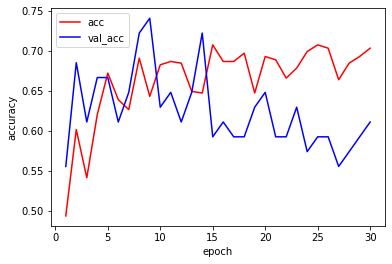

In [8]:
import matplotlib.pyplot as plt
x = range(1,epochs+1)
fig = plt.figure(1)
plt.plot(x, history[1], label = "acc", color = "red")
plt.plot(x, history[3], label = "val_acc", color = "blue")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()